<a href="https://colab.research.google.com/github/avinashyadav11/NYC-Taxi-Trip-Time-Prediction-ML/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

# Objective:

**To Explore various attributes and build a Predictive model that predicts the total trip duration of taxi trips in New York City.**


## Architecture :-

Data Preparation and Exploratory Data Analysis > Build Predictive Model using Multiple Techniques/Algorithms > Optimal Model identified through Testing and Evaluation

# Importing necessary libraries & Loading Dataset

In [72]:
#importing required packages

import pandas as pd #data processing
import numpy as np  #linear algebra

#data visualisation
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import datetime as dt

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the dataset

In [74]:
#reading dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma Better/NYC Taxi Trip Time Prediction- Capstone Project 2/NYC Taxi Data.csv', header=0, parse_dates=True)


## Exploring the Data

In [75]:
df.head() #gives by default toop 5 rows in datase

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [76]:
#Shape of data 

print ('No. of Examples(rows): ',df.shape[0])
print ('No. of Features(columns) : ', df.shape[1])

No. of Examples(rows):  1458644
No. of Features(columns) :  11


In [77]:
#Columns in our data

df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

**Independent Variables**


- id — a unique identifier for each trip
- vendor_id — a code indicating the provider associated with the trip record
- pickup_datetime — date and time when the meter was engaged
- dropoff_datetime — date and time when the meter was disengaged
- passenger_count — the number of passengers in the vehicle (driver entered value)
- pickup_longitude — the longitude where the meter was engaged
- pickup_latitude — the latitude where the meter was engaged
- dropoff_longitude — the longitude where the meter was disengaged
- dropoff_latitude — the latitude where the meter was disengaged
- store_and_fwd_flag — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.

**Target Variable**
- trip_duration — duration of the trip in seconds

#  Data Cleaning
 Checking for Dtype and Null Values

In [78]:
df.info() #Attribute information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


 - We have id, pickup_datetime, dropoff_datetime, and store_and_fwd_flag of the type ‘object’.
 - vendor_id, passenger_count, and trip_duration are of type int.
 - pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are of type float.

In [79]:
df.duplicated().sum()   #Checking for Duplicated rows

0

In [80]:
df.isnull().sum() #checking for missing values

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

As we can see there is no null or missing values in our data set which saves us a step of imputing.

Now Let us check for unique values of all columns.

In [81]:
print(df.nunique().sort_values()) #Checking for unique values

vendor_id                   2
store_and_fwd_flag          2
passenger_count            10
trip_duration            7417
pickup_longitude        23047
dropoff_longitude       33821
pickup_latitude         45245
dropoff_latitude        62519
pickup_datetime       1380222
dropoff_datetime      1380377
id                    1458644
dtype: int64



*   We see that id has 1458644 unique values which are equal to the number of rows in our dataset. 
*   There are 2 unique vendor ids.
*   There are 10 unique passenger counts.
*   There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.








In [82]:
df.describe() #statistical summary of our data set for numeric data column

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Text(0.5, 1.0, 'Descriptive Stats')

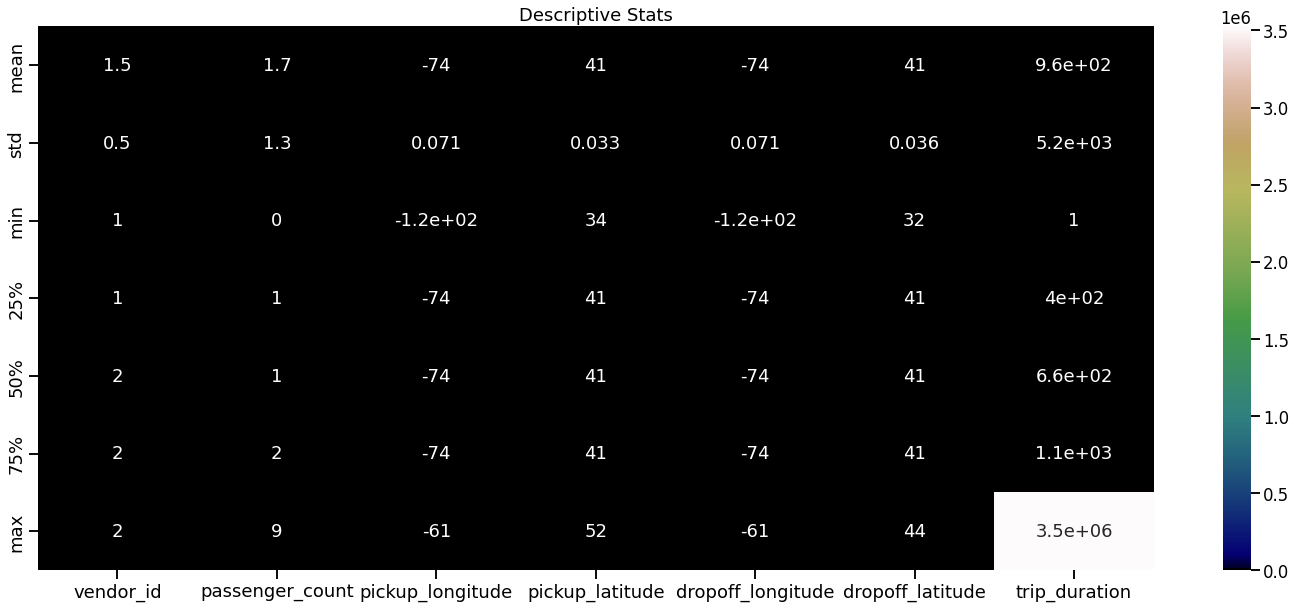

In [83]:
#Descriptive Stats in visual form

plt.figure(figsize=(25,10))
svm = sns.heatmap(df.describe()[1:], annot=True, cmap='gist_earth',annot_kws={"size": 18})
svm.set_xticklabels(svm.get_xmajorticklabels(), fontsize = 18)
svm.set_yticklabels(svm.get_ymajorticklabels(), fontsize = 18)

plt.title('Descriptive Stats')

- We can observe that there were trips having 0 passengers which we can consider as false trip.


- Also, there are trips having trip duration upto 3526282 seconds (Approx. 980 hours) which is kind of impossible in a day.

# Feature Creation

 - Let us create some new features from the existing variables so that we can gain more insights from the data.

 - Remember pickup_datetime and dropoff_datetime were both of type object.
If we want to make use of this data, we can convert it to datetime object which contains numerous functions with which we can create new features that we will see soon.




In [84]:
# Now will analyze this features
#  2   pickup_datetime     1458644 non-null  object 
#  3   dropoff_datetime    1458644 non-null  object

# We can convert it to datetime using the following code.

df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

Now if you will run the dtypes function again, you will be able to see the type as datetime64.

Now, let us extract and create new features from this datetime features we just created.

In [85]:
df['pickup_month'] = df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour

df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['dropoff_weekday']=df['dropoff_datetime'].dt.weekday

df['pickup_day'] = df['pickup_datetime'].dt.day
df['dropoff_day']=df['dropoff_datetime'].dt.day

df['pickup_date'] = df['pickup_datetime'].dt.date

df['pickup_min'] = df['pickup_datetime'].dt.minute
df['dropoff_min'] = df['dropoff_datetime'].dt.minute

- The Date and time columns in the Dataset has whole lot story to tell, we have to fetch them as separate features. 


- We do not have to extract pickup and dropoff time both, as they may lead to strong positive correlation between them. (For analysis purpose obviosly we can extract)


- Further we can use these columns for Analysis.

Now let us apply this function and create new columns in the dataset.

# Feature Engineering - Total Distance Travelled


Importing the library which lets us calculate distance from geographical coordinates.

Source - https://stackoverflow.com/questions/24427828/calculate-point-based-on-distance-and-direction

In [86]:
from geopy.distance import great_circle

In [87]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates.


def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

Finally, applying the function to our dataset and creating the feature ‘distance’.

In [88]:
#Calculate distance and assign new column to the dataframe.

df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [89]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_date,pickup_min,dropoff_min,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,3,17,17,0,0,14,14,2016-03-14,24,32,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,0,0,6,6,12,12,2016-06-12,43,54,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,11,12,1,1,19,19,2016-01-19,35,10,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,4,19,19,2,2,6,6,2016-04-06,32,39,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,3,13,13,5,5,26,26,2016-03-26,30,38,1.188590


In [90]:
#Check the type of each variable
df.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


# EDA & Data Preprocessing




<b>Vendor id</b>

Text(0.5, 1.0, 'Vendor ID')

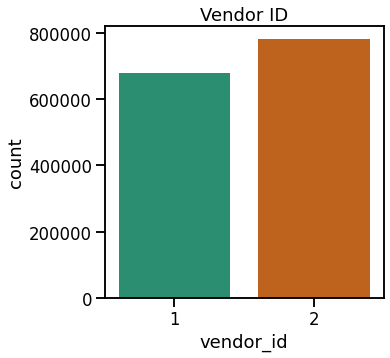

In [91]:
#vendor_id - a code indicating the provider associated with the trip record

sns.set_context('talk')

plt.figure(figsize=(5,5))
sns.countplot(df['vendor_id'], palette='Dark2')
plt.title("Vendor ID")

- From Above Visualization, we can say that there are **2 vendors** (Service Providers).


- 2nd Service provider is the most opted one by New Yorkers.

**Store and Forward Flag**

In [92]:
df['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

We see there are less than 1% of trips that were stored before forwarding.



Text(0.5, 1.0, 'Store and Forward Flag')

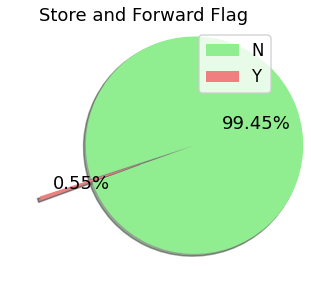

In [93]:
#Store & Forward flag

plt.figure(figsize=(5,5))
plt.pie(df['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['N','Y'])
plt.title("Store and Forward Flag")

- We see there are less than 1% of trips that were stored before forwarding

- The number of N flag is much larger. We can later see whether they have any relation with the duration of the trip.

- We will also perform Conversion of 'store_and_fwd_flag' and 'vendor_id' to be Label encoded in a while as those are Categorical features. 

**Target Variable - Trip duration**

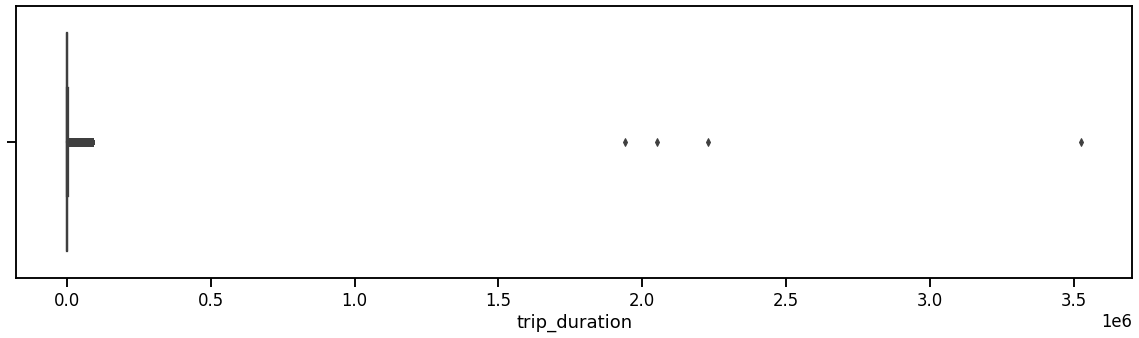

In [94]:
#Visualising Trip duration

plt.figure(figsize=(20,5))
sns.boxplot(df['trip_duration'])

- Probably in this visualization we can clearly see some outliers , their trips are lasting between 1900000 seconds (528 Hours) to somewhere around 3500000 (972 hours) seconds which is impossible in case of taxi trips , How can a taxi trip be that long ?


- It’s Quite suspicious. We’ll have to get rid of those Outliers.

In [95]:
df['trip_duration'].sort_values(ascending=False) #lets see trip duration column in descending order

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: trip_duration, Length: 1458644, dtype: int64

We can see that there is some entries which is significantly different from others.

As there is this 4 rows only, let us drop this rows.

In [96]:
#Dropping these 4 rows

df.drop(df[df['trip_duration'] == 3526282].index, inplace = True)
df.drop(df[df['trip_duration'] == 2227612].index, inplace = True)
df.drop(df[df['trip_duration'] == 2049578].index, inplace = True)
df.drop(df[df['trip_duration'] == 1939736].index, inplace = True)


In [97]:
df.shape

(1458640, 23)

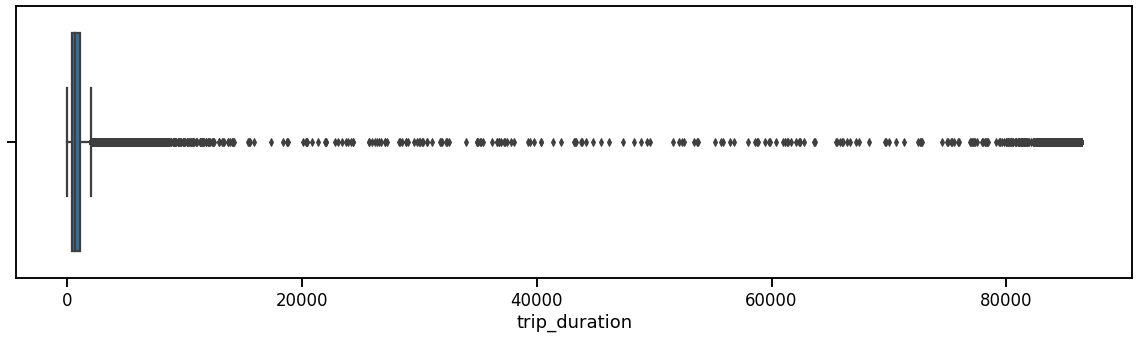

In [98]:
plt.figure(figsize=(20,5))
sns.boxplot(df['trip_duration'])

**Passenger Count**

Text(0.5, 1.0, 'Passenger Count Distribution')

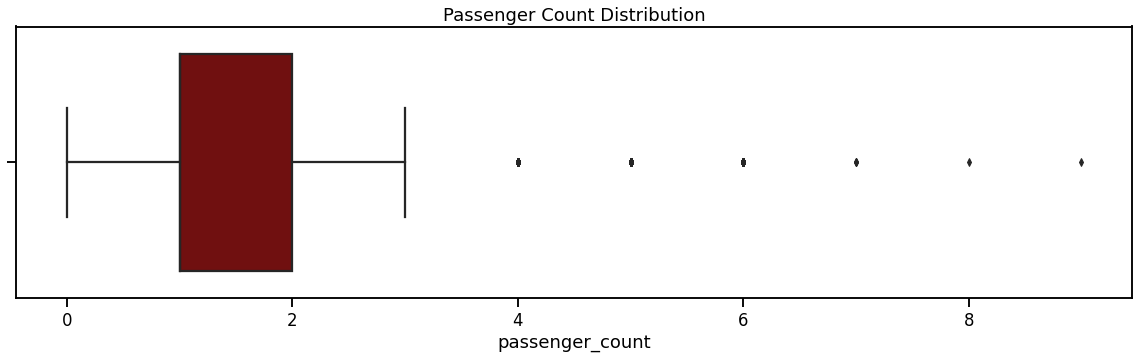

In [99]:
#Spread of Passenger count

plt.figure(figsize=(20,5))
sns.boxplot(df['passenger_count'], color='maroon')
plt.title('Passenger Count Distribution')

- Above visualization tells us that there were most number of trips are done by 1-2 passenger(s).


- 5 - 9 passengers trip states us that cab must be a Large vehicle. 

In [100]:
df.passenger_count.value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

 - There are some trips with even 0 passenger count.
 - And 3 trips with 7 passengers
 - And there is only 1 trip each for 8 and 9 passengers.

In [101]:
# Let us remove the rows which have 0 or 7 or 9 passenger count.
df = df[df['passenger_count'] > 0]
df = df[df['passenger_count'] <= 6]

df.passenger_count.value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

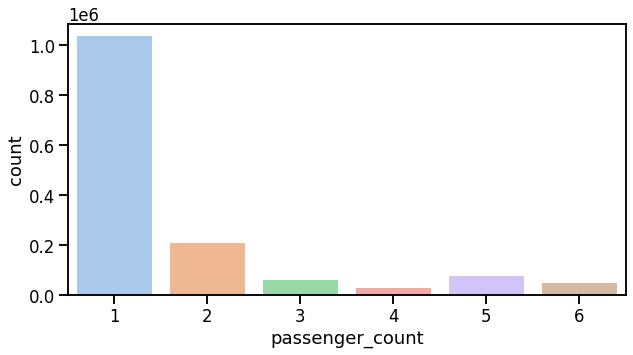

In [102]:
#Passenger count
plt.figure(figsize=(10,5))

sns.countplot(df['passenger_count'], palette='pastel')

 - Now, that seems like a fair distribution.

 - We see the highest amount of trips are with 1 passenger.

**Distance**

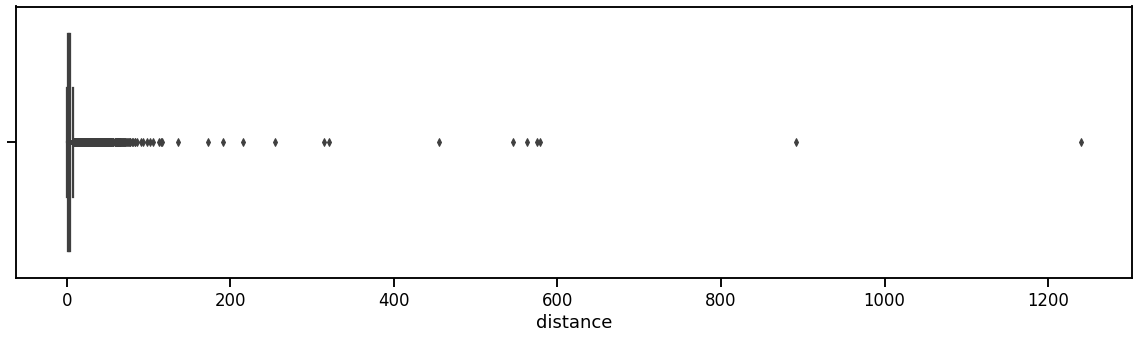

In [103]:
plt.figure(figsize = (20,5))
sns.boxplot(df.distance)
plt.show()

In [104]:
print("There are {} trip records with 0 km distance".format(df.distance[df.distance == 0 ].count()))

There are 5887 trip records with 0 km distance


The reasons for 0 km distance can be:

 - The dropoff location couldn’t be tracked.
 - The driver deliberately took this ride to complete a target ride number.
 - The passengers canceled the trip.
 
We will analyze these trips further in bivariate analysis.

In [105]:
df[df.distance == 0 ].head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_date,pickup_min,dropoff_min,distance
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,2,2,18,18,0,0,29,29,2016-02-29,39,42,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,1109,5,5,18,18,1,1,10,10,2016-05-10,7,26,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,5,5,23,23,0,0,16,16,2016-05-16,15,31,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,580,1,1,19,19,0,0,25,25,2016-01-25,45,54,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,27,1,1,22,22,2,2,27,27,2016-01-27,29,29,0.0


**Trips per Day in a week**

Text(0, 0.5, 'Counts')

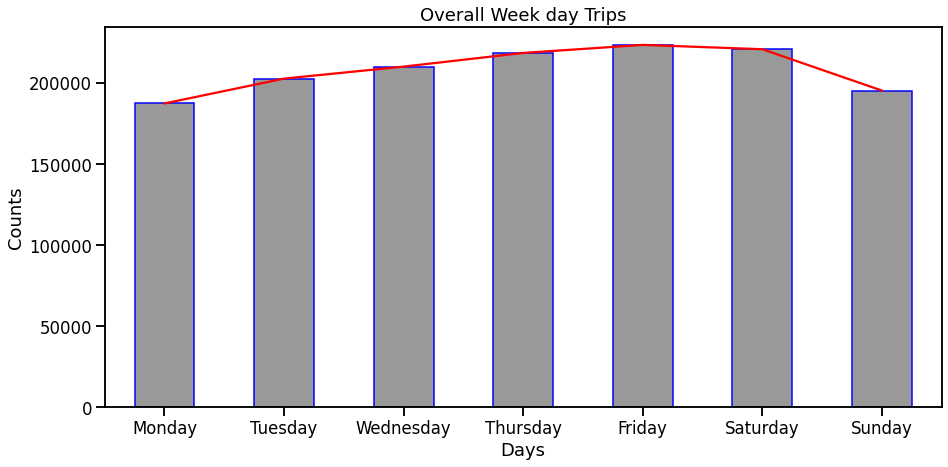

In [106]:
#Analyzing week day trips

plt.figure(figsize=(15,7))
pickup_week = df['pickup_weekday'].value_counts()
pickup_week.sort_index().plot(kind='bar',edgecolor='blue',color = '0.6')
pickup_week.sort_index().plot(kind='line',color = 'red')

plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.title('Overall Week day Trips')
plt.xlabel('Days')
plt.ylabel('Counts')

- Observations tells us that Fridays and Saturdays are those days in a week when New Yorkers prefer to rome in the city. GREAT !!

<b>Trips per Hour<b>

Text(0, 0.5, 'Counts')

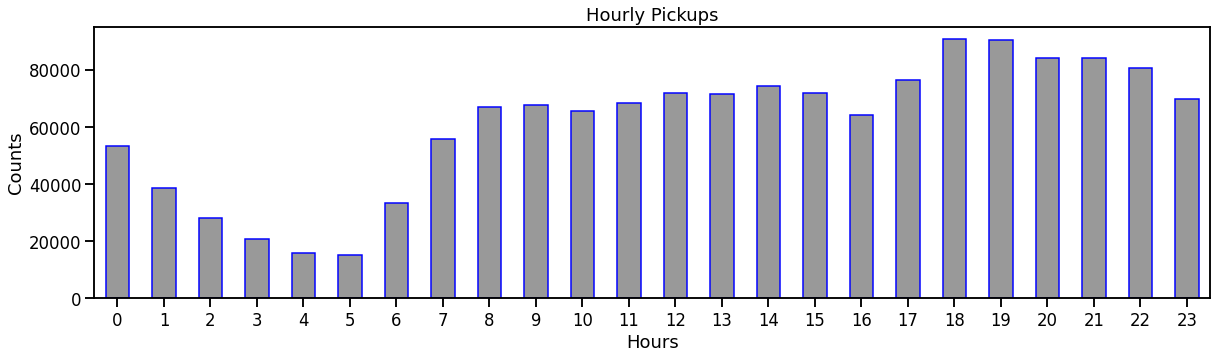

In [107]:
#Analyzing hourly pickups

plt.figure(figsize=(20,5))
pickup_hour = df['pickup_hour'].value_counts()
pickup_hour.sort_index().plot(kind='bar',edgecolor='blue',color = '0.6')
plt.xticks(rotation=0)

plt.title("Hourly Pickups")
plt.xlabel('Hours')
plt.ylabel('Counts')

- In which hour we get to see maximum pickups ? - Rush hours (5 pm to 10 pm), probably office leaving time.

- Thus we observe that most pickups and drops occur in the evening. While the least drops and pickups occur during midday.

<b>Trips per Day in a Month<b>

Text(0, 0.5, 'Counts')

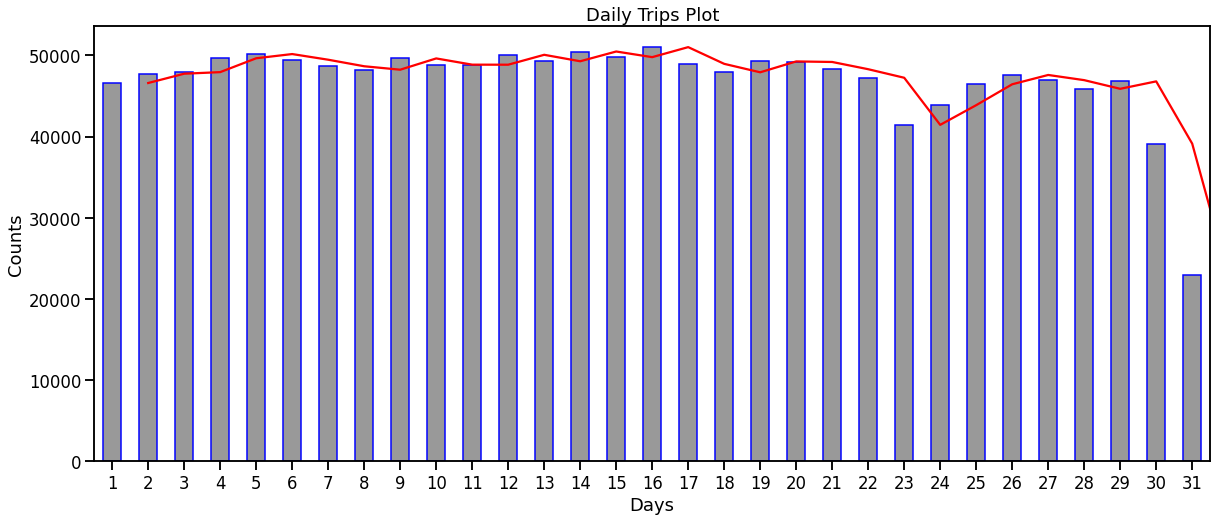

In [108]:
#Analyzing Daily trip

plt.figure(figsize=(20,8))
pickup_day = df['pickup_day'].value_counts()
pickup_day.sort_index().plot(kind='line',color = 'red')
pickup_day.sort_index().plot(kind='bar',edgecolor='blue',color = '0.6')
plt.xticks(rotation=0)



plt.title('Daily Trips Plot')
plt.xlabel('Days')
plt.ylabel('Counts')

- Seem like New Yorker’s do not prefer to get a Taxi on Month end’s , there is a significant drop in the Taxi trip count as month end’s approach.

<b>Trips per month<b>

In [109]:
sorted(df['pickup_month'].unique())

[1, 2, 3, 4, 5, 6]

Text(0.5, 1.0, 'Overall Monthly trips')

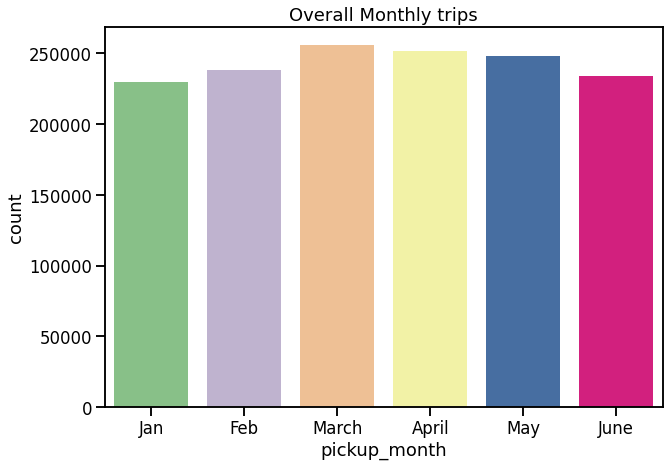

In [110]:
#monthly trips exploration

plt.figure(figsize=(10,7))
sns.countplot(df['pickup_month'], palette='Accent')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'])
plt.title('Overall Monthly trips')

- We've data of 6 months.

- Number of trips in a particular month - March and April marking the highest.

- January being lowest probably due to extreme SnowFall NYC.

# Bivariate Analysis with Target Variable


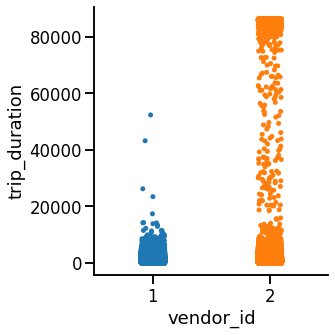

In [111]:
# Trip Duration per Vendor estimator=np.mean
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=df)


Vendor id 2 takes longer trips as compared to vendor 1.

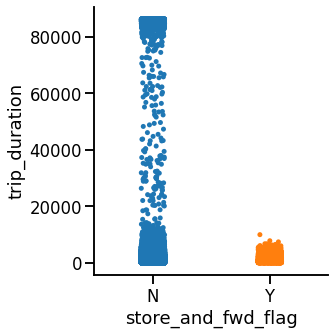

In [112]:
# Trip Duration per Store and Forward Flag
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=df,kind='strip')

Trip duration is generally longer for trips whose flag was not stored.



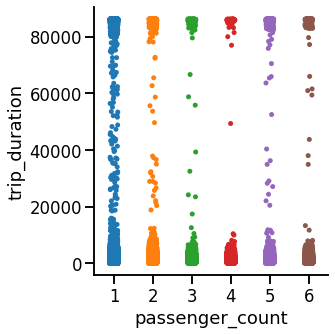

In [113]:
# Trip Duration per hour
sns.catplot(y='trip_duration',x='passenger_count',data=df,kind='strip')

There is no visible relation between trip duration and passenger count.


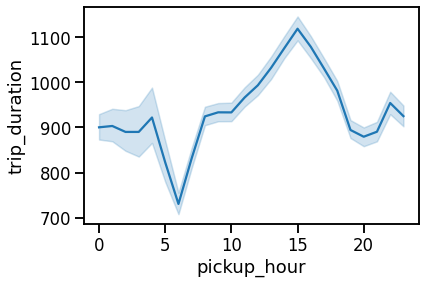

In [114]:
# Trip Duration per time of day
sns.lineplot(x='pickup_hour',y='trip_duration',data=df)

We see the trip duration is the maximum around 3 pm which may be because of traffic on the roads.
Trip duration is the lowest around 6 am as streets may not be busy.

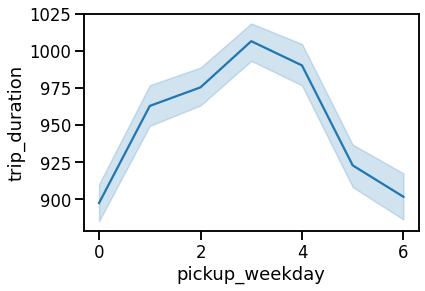

In [115]:
# Trip Duration per Day of Week
sns.lineplot(x='pickup_weekday',y='trip_duration',data=df)

Trip duration is the longest on Thursdays closely followed by Fridays.

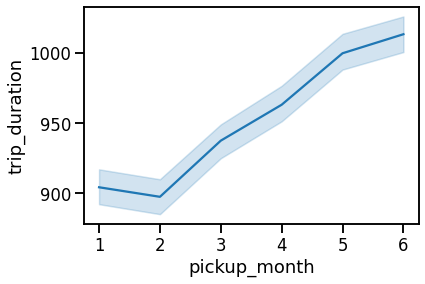

In [116]:
# Trip Duration per month
sns.lineplot(x='pickup_month',y='trip_duration',data=df)

From February, we can see trip duration rising every month.

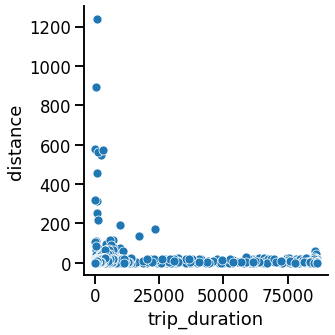

In [117]:
sns.relplot(y=df.distance,x='trip_duration',data=df)


We can see there are trips which trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.

Let us see few rows whose distances are 0.

In [118]:
df[df['distance'] == 0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_date,pickup_min,dropoff_min,distance
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,2,2,18,18,0,0,29,29,2016-02-29,39,42,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,1109,5,5,18,18,1,1,10,10,2016-05-10,7,26,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,5,5,23,23,0,0,16,16,2016-05-16,15,31,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,580,1,1,19,19,0,0,25,25,2016-01-25,45,54,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,27,1,1,22,22,2,2,27,27,2016-01-27,29,29,0.0


We can see even though distance is recorded as 0 but trip duration is definitely more.

- One reason can be that the dropoff coordinates weren’t recorded.
- Another reason one can think is that for short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.

**Label Encoding**

In [119]:
#Label Encoding Features having Categorical Values

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['store_and_fwd_flag'] = enc.fit_transform(df['store_and_fwd_flag'])
df['vendor_id'] = enc.fit_transform(df['vendor_id'])

- Conversion of 'store_and_fwd_flag' and 'vendor_id' to be Label encoded as those are Categorical features , binarizing them will help us to compute them with ease.


- We can convert these features into “category” type by function called “astype(‘category’)” that will speed up the Computation. Since, my plan is to go with PCA for dimension reduction, I’m not going with that approach.

Text(0.5, 1.0, 'Correlation Plot')

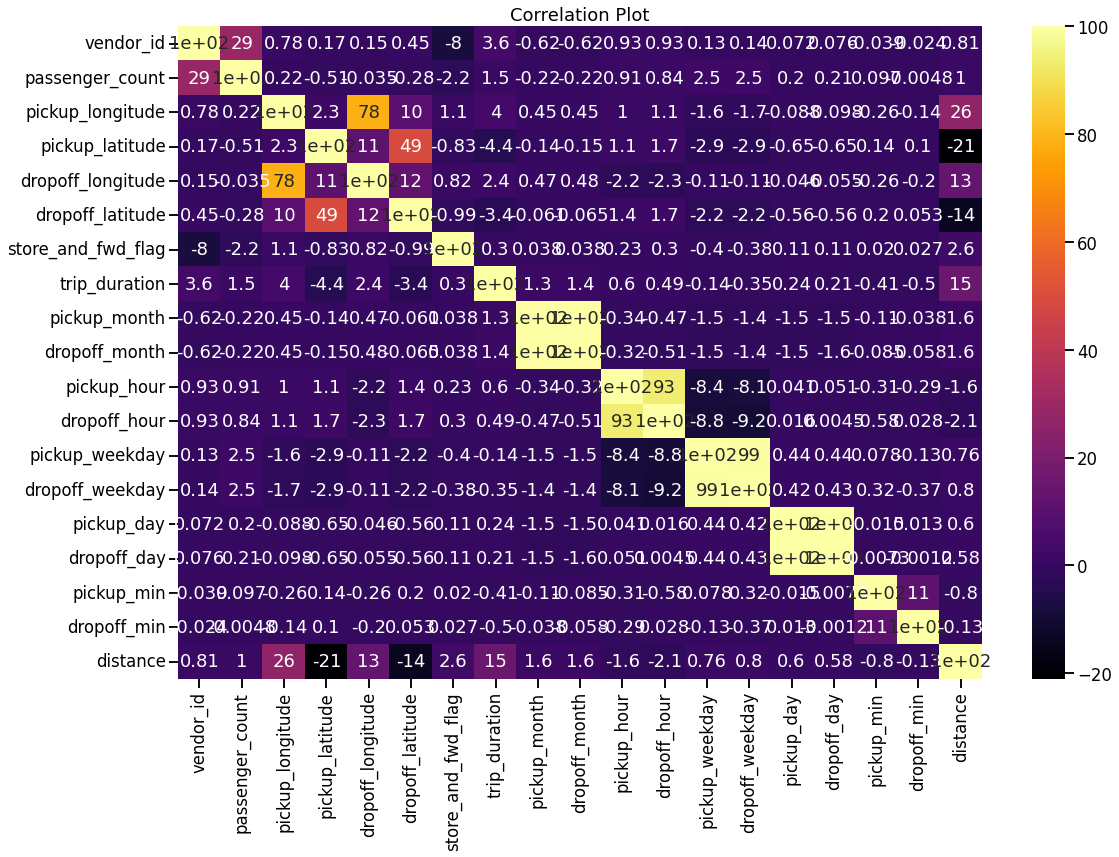

In [120]:
#Plotting Pearson Correlation heatmap

plt.figure(figsize=(18,12))
sns.heatmap(df.corr()*100, annot=True, cmap='inferno')
plt.title('Correlation Plot')

In [121]:
nyc_taxi_df = df.drop(['id','pickup_datetime','pickup_date','dropoff_datetime','distance'], axis=1)
nyc_taxi_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_min,dropoff_min
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,3,3,17,17,0,0,14,14,24,32
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,6,0,0,6,6,12,12,43,54
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,1,11,12,1,1,19,19,35,10
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,4,4,19,19,2,2,6,6,32,39
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,3,3,13,13,5,5,26,26,30,38


In [122]:
nyc_taxi_df.shape

(1458575, 18)

# Normalization

In [123]:
#Predictors and Target Variable

X = nyc_taxi_df.drop(['trip_duration'], axis=1)
y = np.log(nyc_taxi_df['trip_duration'])

In [124]:
# Normalising Predictors and creating new dataframe....................

from sklearn.preprocessing import StandardScaler
cols = X.columns
print(cols)

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_month', 'dropoff_month', 'pickup_hour', 'dropoff_hour',
       'pickup_weekday', 'dropoff_weekday', 'pickup_day', 'dropoff_day',
       'pickup_min', 'dropoff_min'],
      dtype='object')


In [125]:
scaler = StandardScaler()
print(scaler)

StandardScaler()


In [126]:
new_df = scaler.fit_transform(X)
new_df.shape

(1458575, 17)

In [127]:
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_min,dropoff_min
0,0.932376,-0.505698,-0.122246,0.517488,0.124378,0.384565,-0.074459,-0.307453,-0.307634,0.530258,0.524555,-1.561057,-1.561081,-0.172829,-0.172879,-0.322670,0.136133
1,-1.072528,-0.505698,-0.097712,-0.375858,-0.368965,-0.575340,-0.074459,1.477163,1.476791,-2.126171,-2.097458,1.509521,1.505478,-0.402632,-0.402682,0.774026,1.399030
2,0.932376,-0.505698,-0.078128,0.395900,-0.451801,-1.162274,-0.074459,-1.497197,-1.497250,-0.407305,-0.246625,-1.049294,-1.049988,0.401676,0.401628,0.312259,-1.126764
3,0.932376,-0.505698,-0.515547,-0.941334,-0.549973,-1.256128,-0.074459,0.287419,0.287175,0.842779,0.833027,-0.537531,-0.538895,-1.092039,-1.092091,0.139097,0.537964
4,0.932376,-0.505698,0.006128,1.286113,0.006982,0.855961,-0.074459,-0.307453,-0.307634,-0.094784,-0.092389,0.997758,0.994385,1.205984,1.205938,0.023655,0.480560


Normalizing the Dataset using Standard Scaling Technique.


Now, Why Standard Scaling ? Why not MinMax or Normalizer ?


- It is because MinMax adjusts the value between 0’s and 1’s , which tend to work better for optimization techniques like Gradient descent and machine learning algorithms like KNN.


- While, Normalizer uses distance measurement like Euclidean or Manhattan, so Normalizer tend to work better with KNN.

# The First Approach - Decomposition using Principal Component Analysis (PCA)

- Now that we’re done, we have to pass our Scaled Dataframe in PCA model and observe the elbow plot to get better idea of explained variance.


- We'll also go through a approach without using PCA in Second Part and Later compare results with PCA approach.

In [128]:
X = new_df

In [129]:
#Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=len(nyc_taxi_df.columns)-1)
pca.fit_transform(X)
var_rat = pca.explained_variance_ratio_
var_rat

array([1.26453537e-01, 1.19382116e-01, 1.15850404e-01, 1.10255386e-01,
       1.04826966e-01, 8.27645431e-02, 7.66156802e-02, 6.55522558e-02,
       5.81093704e-02, 5.20876958e-02, 4.15381163e-02, 2.98929795e-02,
       1.22976185e-02, 3.89385066e-03, 3.51734590e-04, 1.27730106e-04,
       1.64220363e-08])

<BarContainer object of 17 artists>

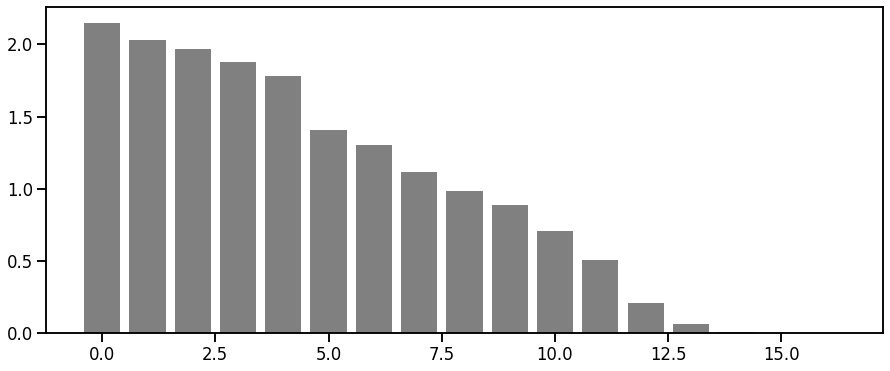

In [130]:
#Variance Ratio vs PC plot

plt.figure(figsize=(15,6))
plt.bar(np.arange(pca.n_components_), pca.explained_variance_, color="grey")

- At 12th component our PCA model seems to go Flat without explaining much of a Variance.

Text(0.5, 1.0, 'Elbow Plot')

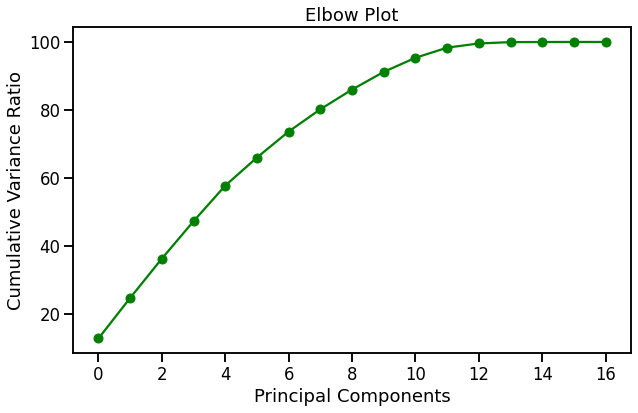

In [131]:
#Cumulative Variance Ratio

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(var_rat)*100, color="g", marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.title('Elbow Plot')

In [132]:
#Applying PCA as per required components

pca = PCA(n_components=12)
transform = pca.fit_transform(X)
pca.explained_variance_

array([2.1497116 , 2.02949736, 1.96945821, 1.87434285, 1.78205964,
       1.4069982 , 1.30246746, 1.11438911, 0.98785997, 0.88549143,
       0.70614846, 0.508181  ])

- Above , we had considered 12 as a required number of components and extracted new features by transforming the Data.

Text(0.5, 1.0, 'Contribution of a Particular feature to our Principal Components')

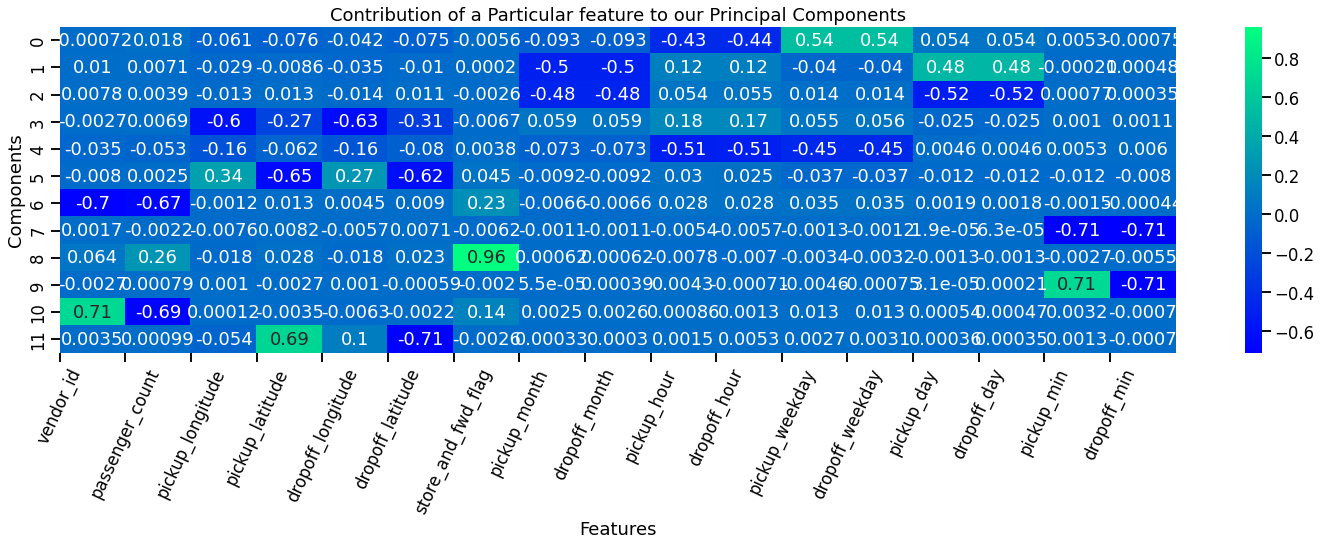

In [133]:
#importance of features in Particular Principal Component

plt.figure(figsize=(25,6))
sns.heatmap(pca.components_, annot=True, cmap="winter")
plt.ylabel("Components")
plt.xlabel("Features")
plt.xticks(np.arange(len(X.columns)), X.columns, rotation=65)
plt.title('Contribution of a Particular feature to our Principal Components')

- Above plot gives us detailed idealogy of which feature has contributed more or less to our each Principal Component.


- Pricipal Components are our new features which consists of Information from every other original Feature we have. 


- We reduce the Dimensions using PCA by retaining as much as Information possible. 

# Splitting Data and Choosing Algorithms

- Let’s pass the PCA Transformed data in our Machine Learning Regression Algorithms. To begin with , Linear Regression is a good approach, by splitting our Data into Training and Testing (30%).


 - So, I want to approach from base model built using basic Linear Regression and then bring in more Sophisticated Algorithms - Decision Tree & Random Forest. It will give us good idea how Linear Regression performs against Decision Tree Regressor and Random Forest Regressor. Later, we will also approach with same algorithms on "without PCA" data. Finally, we'll evaluate both approaches we took and lay down recommended approach and algorithms.

In [134]:
#Passing in Transformed values as Predcitors

X = transform
y = np.log(nyc_taxi_df['trip_duration']).values

- RMSLE as a evaluation Metrics , We can also hyper tune our Parameters to minimize the loss (RMSLE).

In [135]:
#importing train test split & some important metrics

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021002, 12), (437573, 12), (1021002,), (437573,))

### Linear regression:

- Simple to explain.


- Model training and prediction are fast.


- No tuning is required except regularization.

In [136]:
#implementing Linear regression

from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([6.60730673, 6.73018042, 6.34298622, ..., 6.56786014, 6.35823769,
       6.4122349 ])

In [137]:
#coeficients & intercept

est_lr.intercept_, est_lr.coef_

(6.464385084610067,
 array([-0.02227573, -0.01049946, -0.02321477,  0.00120592, -0.0124628 ,
         0.11692357, -0.0174535 ,  0.00327722,  0.00994111, -0.00328942,
         0.00298062, -0.01422948]))

Interpreting the coefficients:

Here we can see Increase and decrease order at each principal component in trip duration.

**Note: The Units / Values can change everytime you run the model freshly.**

